
Basic Statistics:
       YearsExperience        Salary
count        50.000000      50.00000
mean          9.480000   77370.54740
std           5.485491   28298.92442
min           1.400000   33048.80000
25%           4.500000   53861.88000
50%           9.300000   78598.65000
75%          13.350000   95356.22500
max          19.400000  140646.44000

Slope (m): [4790.35193336]
Intercept (b): 32687.531293415108
Mean Absolute Error (MAE): 7523.29357344496
Mean Squared Error (MSE): 88202004.50198276 




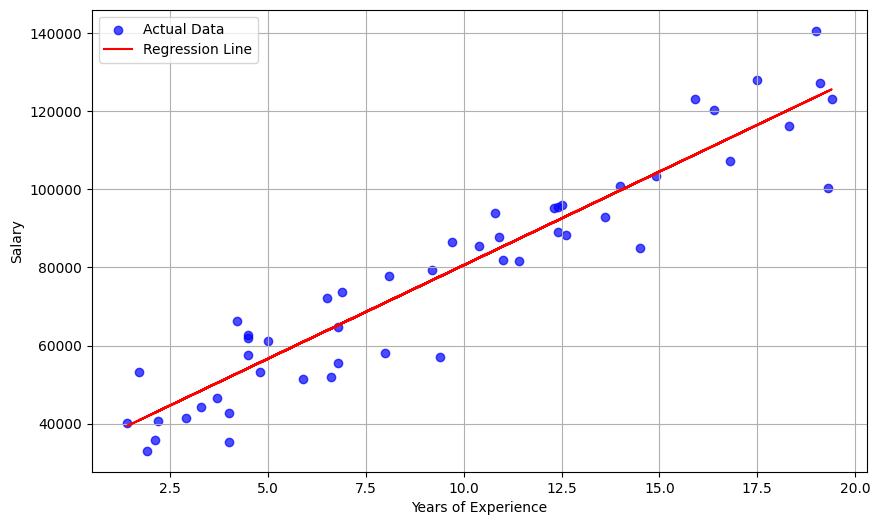

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

data = pd.read_csv('/content/extended_salary_data.csv')

print("\nBasic Statistics:")
print(data.describe())

x = data[['YearsExperience']]
y = data['Salary']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

model = LinearRegression()
model.fit(x_train, y_train)

slope = model.coef_
intercept = model.intercept_
print(f"\nSlope (m): {slope}\nIntercept (b): {intercept}")

y_pred = model.predict(x_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}\nMean Squared Error (MSE): {mse} \n\n")

plt.figure(figsize=(10, 6))
plt.scatter(data['YearsExperience'], data['Salary'], color='blue', alpha=0.7, label='Actual Data')
plt.plot(data['YearsExperience'], model.predict(data[['YearsExperience']]), color='red', label='Regression Line')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend()
plt.grid(True)
plt.show()

Multiple Regression Coefficients: [5412.69474456 -108.43630741]
Multiple Regression Intercept: 30018.500028213544
Mean Absolute Error (MAE) for Multiple Regression: 6891.87599114438
Mean Squared Error (MSE) for Multiple Regression: 81759568.47017042


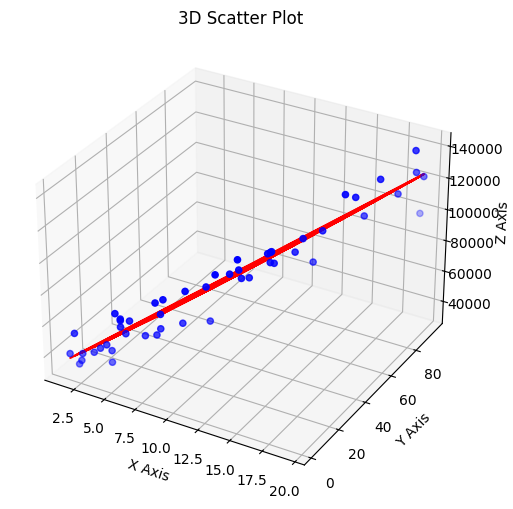

In [32]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

data = pd.read_csv('/content/extended_salary_data.csv')

np.random.seed(42)
data['NumProjectsCompleted'] = (data['YearsExperience'] * np.random.uniform(2, 5, size=len(data))).astype(int)

X = data[['YearsExperience', 'NumProjectsCompleted']]
y = data['Salary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

multi_model = LinearRegression()
multi_model.fit(X_train, y_train)

print("Multiple Regression Coefficients:", multi_model.coef_)
print("Multiple Regression Intercept:", multi_model.intercept_)

# Make predictions on the test set
y_pred_multi = multi_model.predict(X_test)

# Calculate evaluation metrics
mae_multi = mean_absolute_error(y_test, y_pred_multi)
mse_multi = mean_squared_error(y_test, y_pred_multi)

print(f"Mean Absolute Error (MAE) for Multiple Regression: {mae_multi}")
print(f"Mean Squared Error (MSE) for Multiple Regression: {mse_multi}")

from mpl_toolkits.mplot3d import Axes3D

x = data['YearsExperience']
y = data['NumProjectsCompleted']
z = multi_model.predict(data[['YearsExperience', 'NumProjectsCompleted']])
Z = data['Salary']

# Create a figure for 3D plotting
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Plot the points in 3D
ax.plot(x, y, z, c='r')
ax.scatter(x, y, Z, c='b', marker='o')

# Label the axes
ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_zlabel('Z Axis')
ax.set_title('3D Scatter Plot')

plt.show()